#**1.Importing dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**2.Data Collection & Analysis**

In [2]:
#loading the dataset from csv file to a pandas dataframe
df=pd.read_csv("Medical_insurance_data.csv")

In [3]:
#displaying the dataset
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#displaying the 1st 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#No of rows and columns
df.shape

(1338, 7)

In [6]:
#getting the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#checking whether there is null value
df.isnull().sum()  #df.isnull().any()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


#Categorial features
-Sex

-Smoker

-Region

#**3.Data Visualization**

In [8]:
#Statistical measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


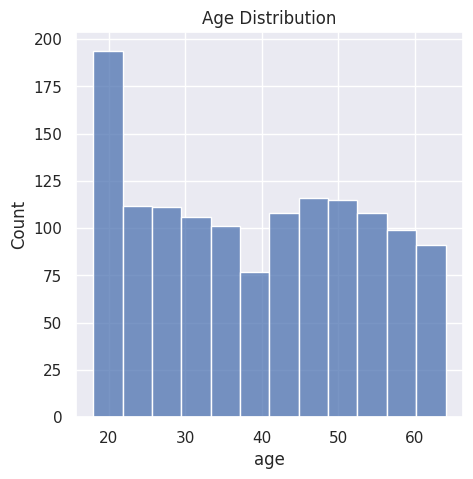

In [9]:
#distribution of age value
sns.set()
plt.figure(figsize=(5,5))
sns.histplot(df['age'])
plt.title('Age Distribution')
plt.show()

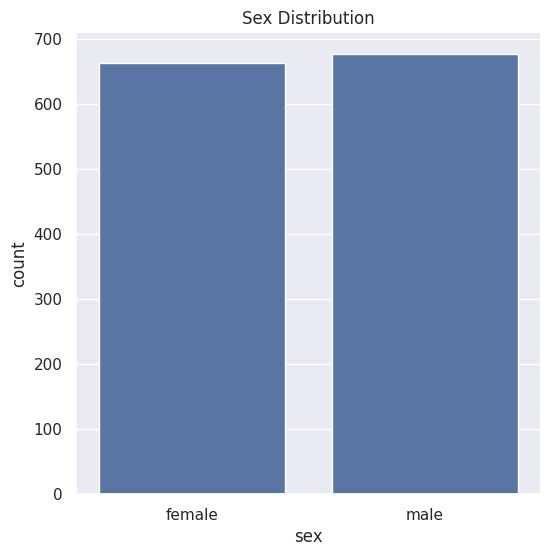

In [10]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title("Sex Distribution")
plt.show()


In [11]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


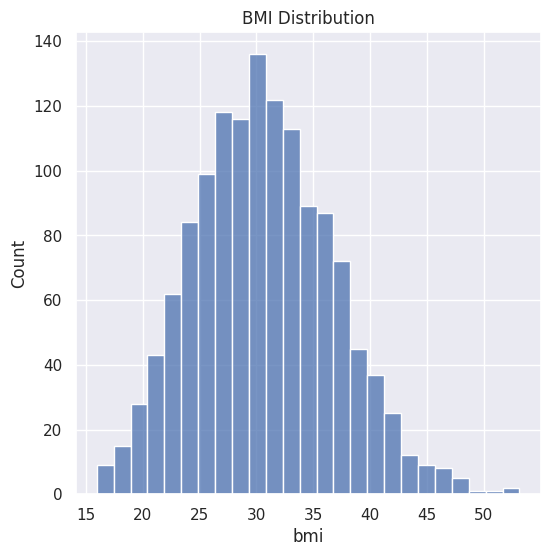

In [12]:
#distribution of bmi
plt.figure(figsize=(6,6))
sns.histplot(df['bmi'])
plt.title("BMI Distribution")
plt.show()

**Normal BMI Range -->18.5 to 24.9**

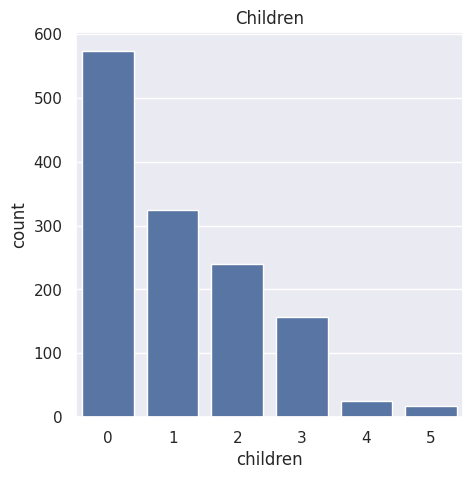

In [13]:
#children column
plt.figure(figsize=(5,5))
sns.countplot(x='children',data=df)
plt.title("Children")
plt.show()

In [14]:
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


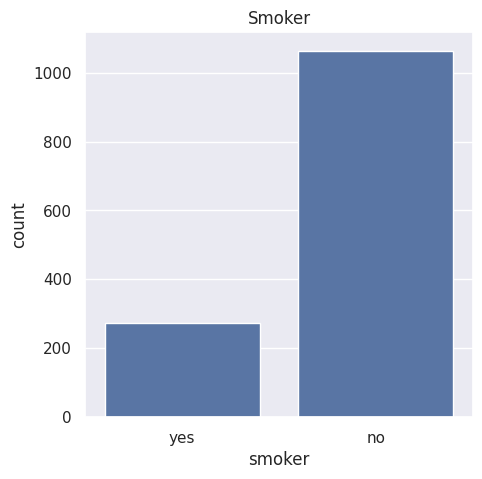

In [15]:
#smoker column
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=df)
plt.title("Smoker")
plt.show()

In [16]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


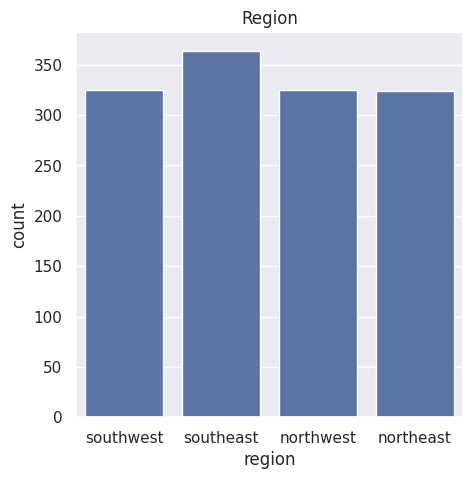

In [17]:
#region column
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=df)
plt.title("Region")
plt.show()

In [18]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


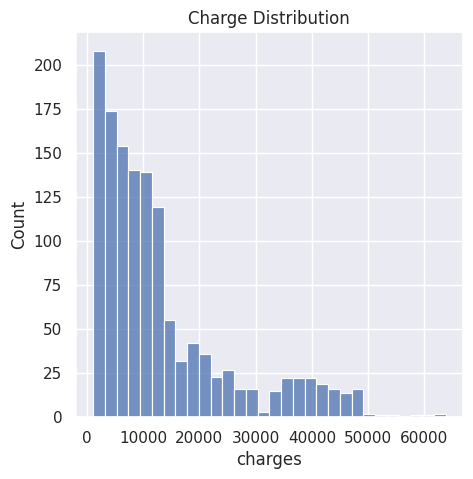

In [19]:
#distribution of charge value
sns.set()
plt.figure(figsize=(5,5))
sns.histplot(df['charges'])
plt.title('Charge Distribution')
plt.show()

#**4.Data Preprocessing**

#**4.1 Encoding the categorical features**

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
df['region']=le.fit_transform(df['region'])
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [24]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<Axes: >

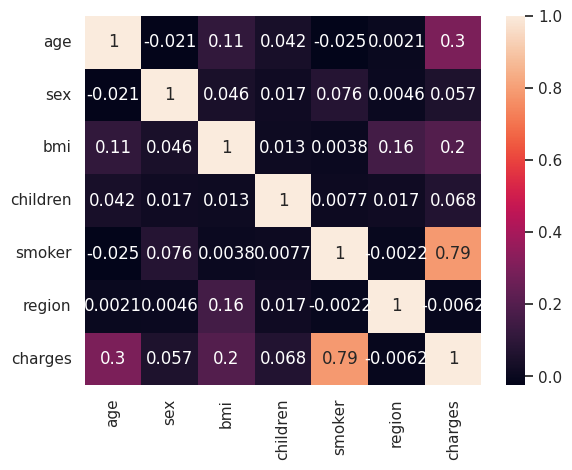

In [25]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

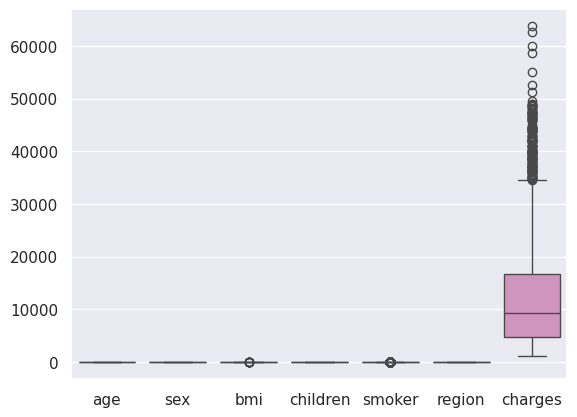

In [26]:
sns.boxplot(df)

In [27]:
sns

<module 'seaborn' from '/usr/local/lib/python3.11/dist-packages/seaborn/__init__.py'>

#**4.2 Splitting the features and target**

In [28]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

In [29]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [30]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


#**4.3 Splitting the train and test data**

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [32]:
x.shape,x_train.shape,x_test.shape

((1338, 6), (936, 6), (402, 6))

In [33]:
y.shape,y_train.shape,y_test.shape

((1338,), (936,), (402,))

#**5.Model Training**

#**5.1 Linear Regression**

In [34]:
from sklearn.linear_model import LinearRegression
#loading the linear regression model
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

**Model Evaluation**

In [35]:
#prediction on training data
y_pred_lr=lr.predict(x_test)

In [36]:
print("Linear Regression")
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score,root_mean_squared_error
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
r2_lr = r2_score(y_test, y_pred_lr)
print("Mean Absolute Error:", mae_lr)
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("R² Score:", r2_lr)

Linear Regression
Mean Absolute Error: 4155.239843059383
Mean Squared Error: 33805466.898688614
Root Mean Squared Error: 5814.246890069995
R² Score: 0.7694415927057693


#**5.2 Decision Tree**

In [37]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [38]:
y_pred_dt=dt.predict(x_test)

In [39]:
print("Decision Tree Regressor")
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt ** 0.5
r2_dt = r2_score(y_test, y_pred_dt)
print("Mean Absolute Error:", mae_dt)
print("Mean Squared Error:", mse_dt)
print("Root Mean Squared Error:", rmse_dt)
print("R² Score:", r2_dt)

Decision Tree Regressor
Mean Absolute Error: 2927.2944894004972
Mean Squared Error: 40057997.491267234
Root Mean Squared Error: 6329.138763786684
R² Score: 0.726798386525431


#**5.3 Random Forest**

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [41]:
y_pred_rf=rf.predict(x_test)

In [42]:
print("Random Forest Regressor")
mae_rf = mean_absolute_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_dt)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R² Score:", r2_rf)

Random Forest Regressor
Mean Absolute Error: 2927.2944894004972
Mean Squared Error: 40057997.491267234
Root Mean Squared Error: 6329.138763786684
R² Score: 0.8555920279861737


#**5.4  XGBoost**

In [43]:
import xgboost as xgb
xgb_regressor= xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_regressor.fit(x_train, y_train)
y_pred_xgb = xgb_regressor.predict(x_test)

In [44]:
print("Random Forest Regressor")
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb= mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)
print("Mean Absolute Error:", mae_xgb)
print("Mean Squared Error:", mse_xgb)
print("Root Mean Squared Error:", rmse_xgb)
print("R² Score:", r2_xgb)

Random Forest Regressor
Mean Absolute Error: 2429.9177385348185
Mean Squared Error: 19960754.585495364
Root Mean Squared Error: 4467.746029654703
R² Score: 0.863864628776911


In [45]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print('-' * 50)


Model: Linear Regression
Mean Absolute Error: 4155.239843059383
Mean Squared Error: 33805466.898688614
R-squared: 0.7694415927057693
--------------------------------------------------
Model: Decision Tree
Mean Absolute Error: 2741.2232604452734
Mean Squared Error: 37014875.308284365
R-squared: 0.7475529409829378
--------------------------------------------------
Model: Random Forest
Mean Absolute Error: 2572.2716145069658
Mean Squared Error: 21614066.77943805
R-squared: 0.852588789063236
--------------------------------------------------
Model: XGBoost
Mean Absolute Error: 2429.9177385348185
Mean Squared Error: 19960754.585495364
R-squared: 0.863864628776911
--------------------------------------------------


**Since XGBoost model performs better than Linear Regression ,Decision Tree and Random Forest,**

**We choose the XGBoost Model to predict the charge**

In [52]:
import pickle as pkl
import xgboost as xgb

# Load the trained model and feature order
pkl.dump(models,open('Insurance.pkl','wb'))
with open('Insurance.pkl', 'rb') as f:
    model = pkl.load(f)
pkl.dump(models,open('feature_order.pkl','wb'))
with open('feature_order.pkl', 'rb') as f:
    feature_order = pkl.load(f)

# Get user input for prediction (categorical)
age = float(input("Enter Age: "))
sex = input("Enter Sex (male/female): ").lower()
bmi = float(input("Enter BMI: "))
children = int(input("Enter number of children: "))
smoker = input("Are you a smoker? (yes/no): ").lower()
region = input("Enter region (northeast, northwest, southeast, southwest): ").lower()
# Assuming you have age, bmi, children defined somewhere
input_data = {
    'age': age,
    'bmi': bmi,
    'children': children,
}

# Add categorical features (one-hot encoded)
for feature_name in ['sex', 'smoker', 'region']:
    for category in ['male', 'female', 'yes', 'no', 'northeast', 'northwest', 'southeast', 'southwest']:
        input_data[f"{feature_name}_{category}"] = 1 if eval(f"{feature_name} == '{category}'") else 0

# Example feature_order (make sure this list is defined properly)
feature_order = ['age', 'bmi', 'children', 'sex_male', 'sex_female', 'smoker_yes', 'smoker_no', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']

# Create the input vector in the correct order
input_data_list = [input_data[feature] for feature in feature_order]

# Convert the list to a numpy array and reshape
input_data_as_numpy_array = np.asarray(input_data_list)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make the prediction
input_data_reshaped = input_data_reshaped[:, :6]
prediction = xgb_regressor.predict(input_data_reshaped)

# Print the prediction
print(f'The predicted insurance cost is {prediction[0]}')


Enter Age: 32
Enter Sex (male/female): male
Enter BMI: 28.880
Enter number of children: 0
Are you a smoker? (yes/no): no
Enter region (northeast, northwest, southeast, southwest): northwest
The predicted insurance cost is 3258.50439453125


#**Conclusion :**

**This predicted value shows variation from the dataset, as it performs with an R² score of almost 86%. This can be improved through parameter tuning.**